# Network-Analysis-for-Information-Retrieval

## Data 

In [6]:
import pandas as pd

FILE_PREFIX = "dblp-ref-"
NB_FILES = 4

corpus = []

# for i in range(0, NB_FILES):
file = './data/' + FILE_PREFIX + '3' + ".json"
data = pd.read_json(file, lines=True)
corpus.append(data)

corpus = pd.concat(corpus, ignore_index=True)

In [7]:
corpus.shape

(79007, 8)

----- Abstracts -----
Mean length of Abstracts 1060.5378252168111
Max length of Abstracts 7139.0
Min length of Abstracts 60.0


----- Authors -----
Number of authors 282514
Number of unique authors 178268
Mean number of authors per paper 1.5847712432966097
Number of paper per author : authors
Wei Wang                92
Yang Yang               54
Mohamed-Slim Alouini    53
Jun Wang                52
Wei Zhang               52
                        ..
Patrice Koehl            1
Saghi Nojoomi            1
Wataru Noguchi           1
Atulan Zaman             1
Eirik Abildsnes          1
Name: count, Length: 178268, dtype: int64


----- Temporal distribution -----


<Axes: >

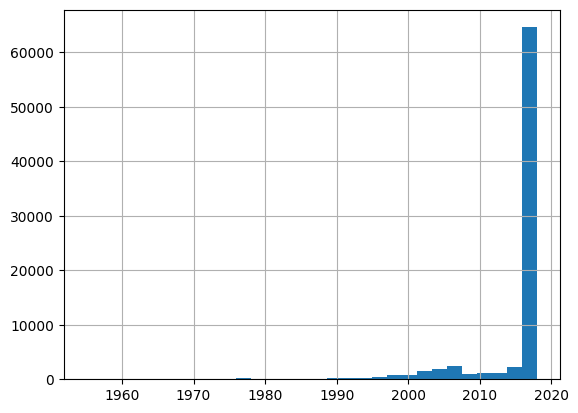

In [8]:
print("----- Abstracts -----")
print("Mean length of Abstracts", corpus['abstract'].str.len().mean())
print("Max length of Abstracts", corpus['abstract'].str.len().max())
print("Min length of Abstracts", corpus['abstract'].str.len().min())

print("\n")
print("----- Authors -----")
df_exploded = corpus.explode('authors')
print("Number of authors", len(df_exploded['authors']))
unique_authors = df_exploded['authors'].unique().tolist()
print("Number of unique authors", len(unique_authors))
print("Mean number of authors per paper", df_exploded['authors'].value_counts().mean())
print("Number of paper per author :", df_exploded['authors'].value_counts())

## temporal distribution
print("\n")
print("----- Temporal distribution -----")
corpus['year'].hist(bins=30)

## Networks

### Authorship Network

Number of nodes 175479
Number of edges 519871


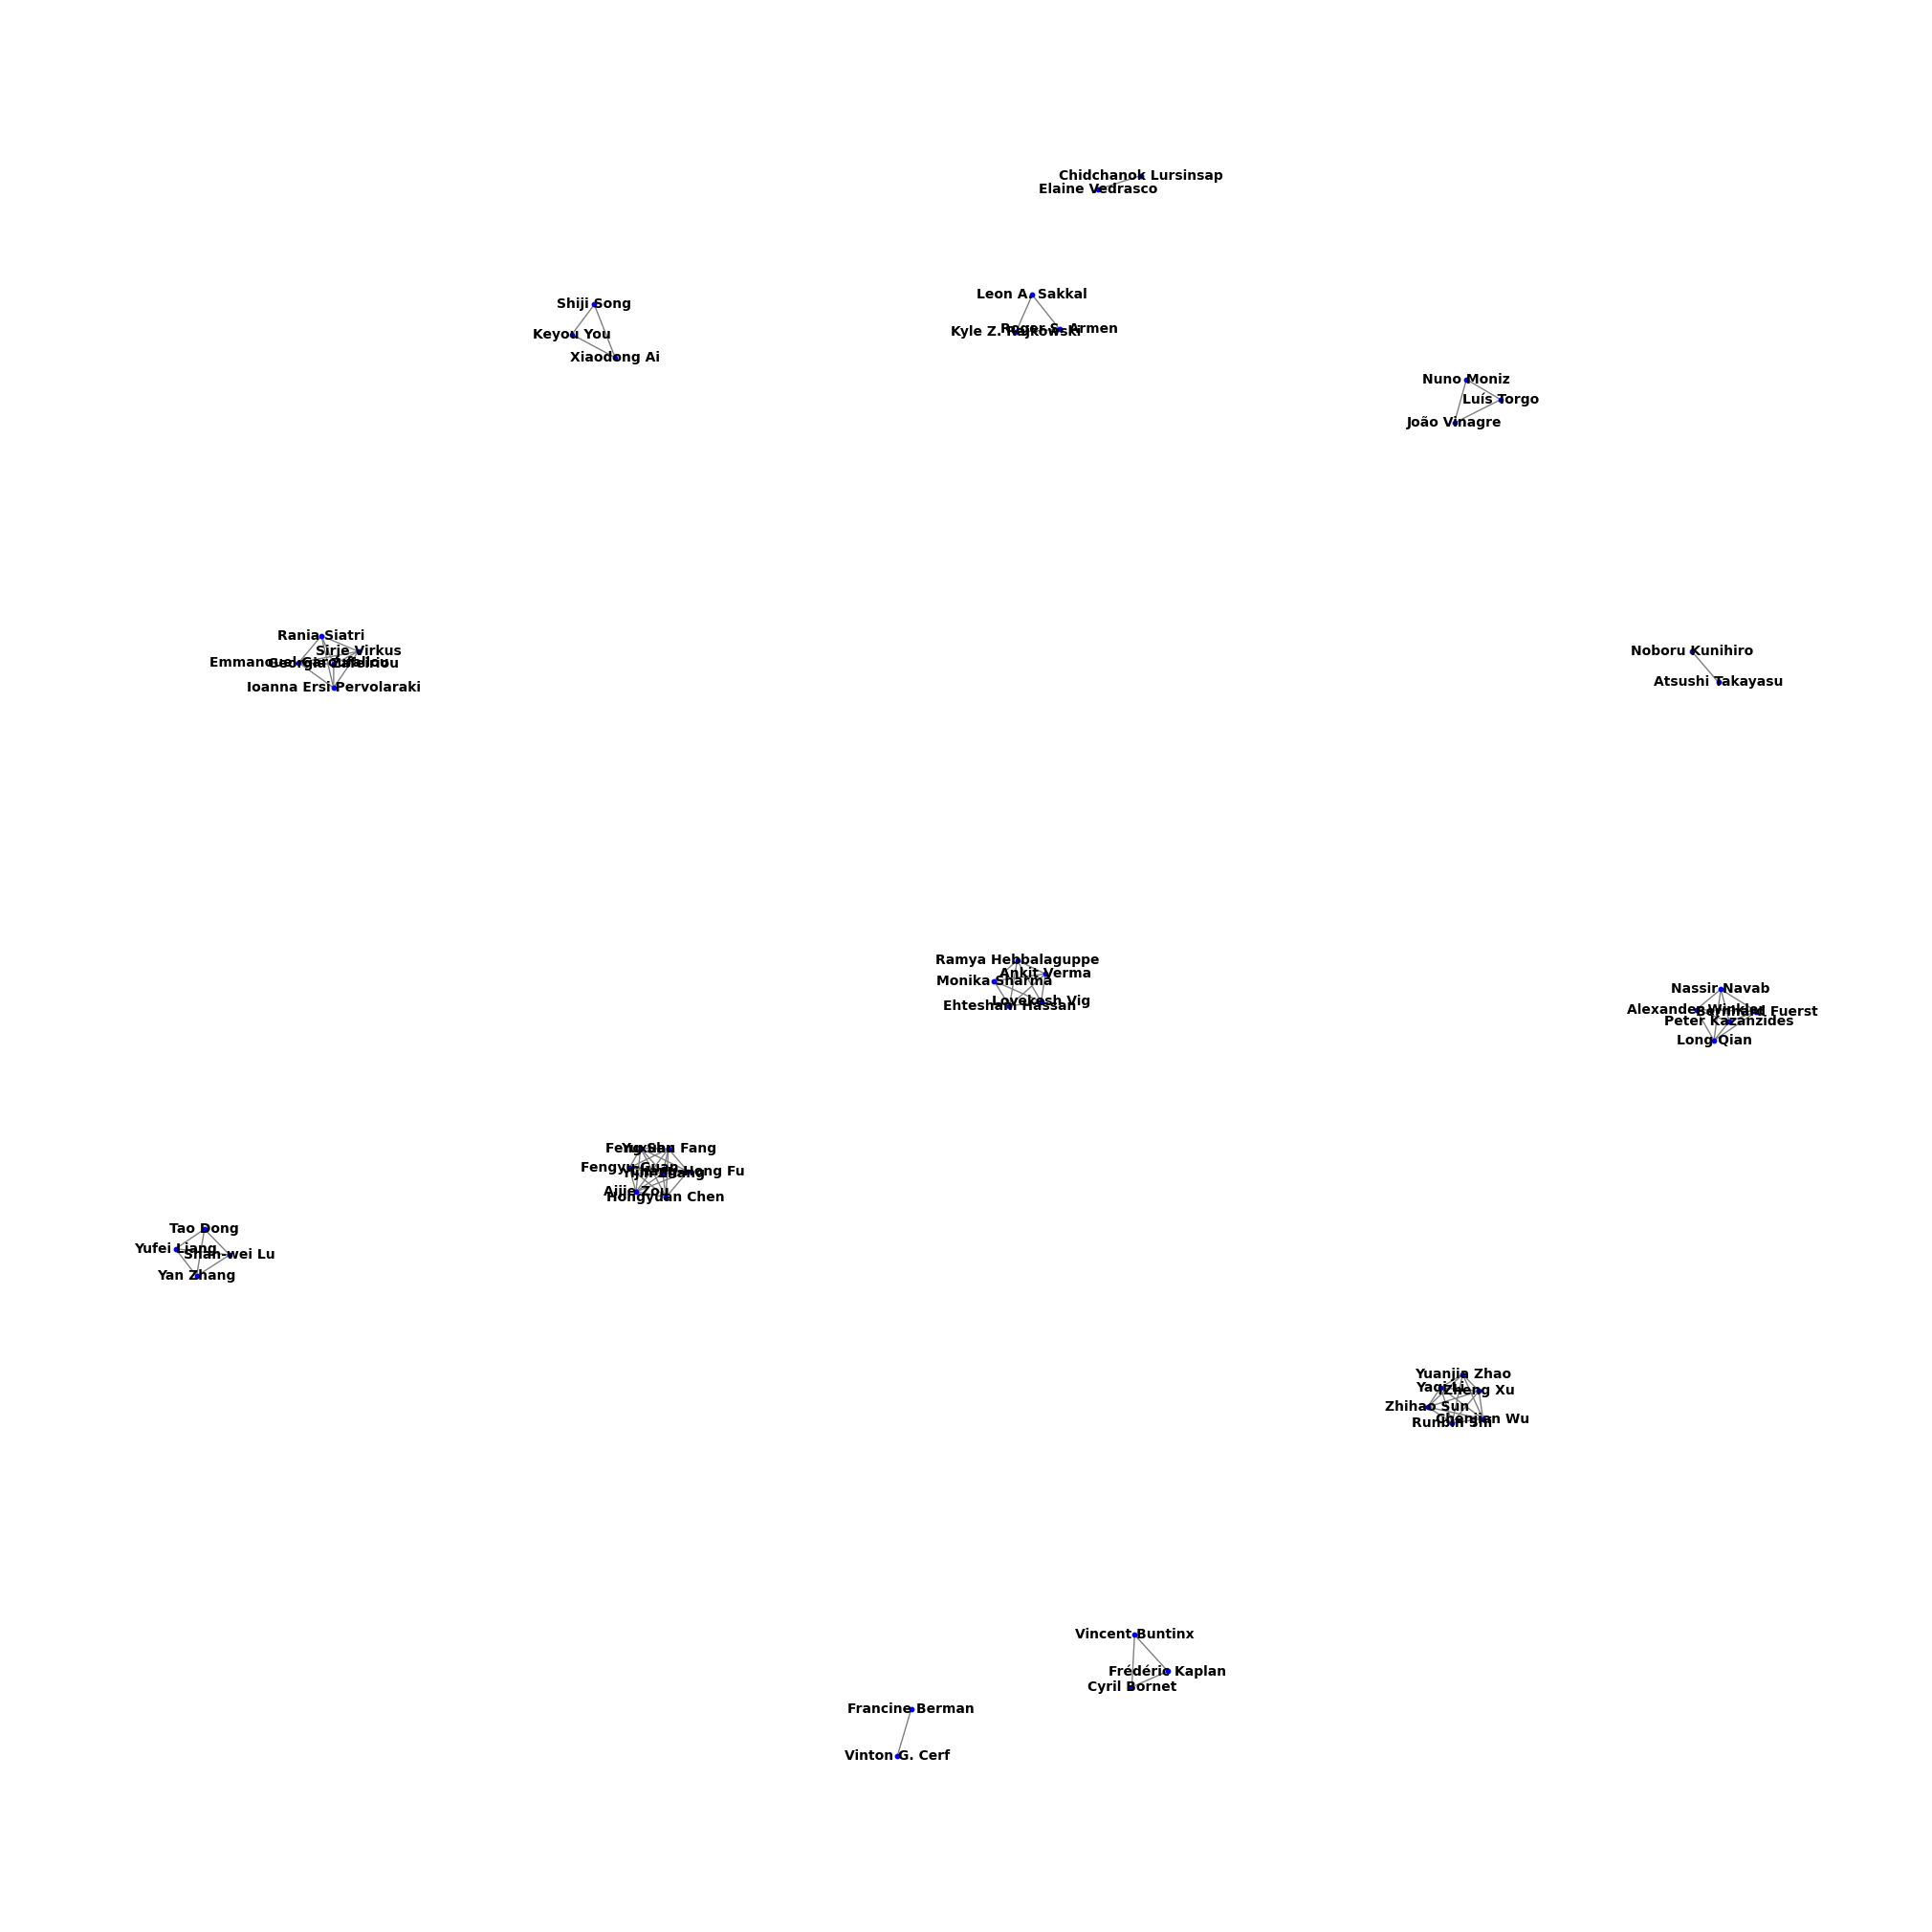

In [31]:
# create a network of authors
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for index, row in corpus.iterrows():
    authors = row['authors']
    if type(authors) == list:
        if len(authors) > 1:
            for i in range(0, len(authors)):
                for j in range(i+1, len(authors)):
                    G.add_edge(authors[i], authors[j])

print("Number of nodes", G.number_of_nodes())
print("Number of edges", G.number_of_edges())

nodes = list(G.nodes)[0:50]
subgraph = G.subgraph(nodes)
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_size=10, node_color='blue', with_labels=True, font_size=10, font_color='black', font_weight='bold', edge_color='gray')
plt.show()

### Document Network

In [ ]:
G = nx.Graph()

for index, row in corpus.iterrows():
    G.add_node(row['id'])
    G.add_nodes_from(row['references'])

# Ajoutez les arêtes au graphe
for index, row in corpus.iterrows():
    source = row['id']
    for target in row['references']:
        G.add_edge(source, target)

print("Number of nodes", G.number_of_nodes())
print("Number of edges", G.number_of_edges())

nx.draw(G, with_labels=True)
plt.show()